In [56]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
def SwedishPump(b):
    """
    @author: ofersh@telhai.ac.il
    The correlation function, assumes a numpy vector {-1,+1} as input
    """
    n = np.size(b)
    E = []
    for k in range(1, n):
        E.append((b[:n - k].dot(b[k:])) ** 2)
    return (n ** 2) / (2 * sum(E))

In [73]:
def SimulatedAnnealing(n=100, max_evals=1000, variation=lambda x: x + 2.0 * np.random.normal(size=len(x)),
                       func=lambda x: x.dot(x), seed=None, alpha=0.99):
    """
    @author: ofersh@telhai.ac.il
    """
    T_init = 6.0
    T_min = 1e-4
    f_upper_bound = np.inf
    eps_satisfactory = 1e-5
    max_internal_runs = 1000
    local_state = np.random.RandomState(seed)
    history = []
    xbest = xmax = np.random.choice([1, -1], size=n)
    fbest = fmax = func(xmax)
    eval_cntr = 1
    T = T_init
    history.append(fmax)
    best_iteration = 0

    while (T > T_min) and eval_cntr < max_evals:
        for _ in range(max_internal_runs):
            x = variation(xmax)
            f_x = func(x)
            eval_cntr += 1
            dE = f_x - fmax
            if dE >= 0 or local_state.uniform(size=1) < np.exp(dE / T):
                xmax = x
                fmax = f_x
            if fmax > fbest:
                fbest = f_x
                xbest = x
                best_iteration = eval_cntr
                if fbest > f_upper_bound - eps_satisfactory:
                    T = T_min
                    break
            history.append(fmax)
        T *= alpha
    return xbest, fbest, history, best_iteration

In [74]:
def monte_carlo(n=100, evals=1000, func=SwedishPump):
    """
    @author: ofersh@telhai.ac.il
    """
    X = []
    FX = []
    fmax = -np.inf
    xmax = 0
    f_history = []
    best_iteration = 0

    for i in range(evals):
        x = np.random.choice([1, -1], size=n)
        f_x = func(x)
        X.append(x)
        FX.append(f_x)
        if f_x > fmax:
            fmax = f_x
            xmax = x
            best_iteration = i + 1  # Iterations start from 1
        f_history.append(fmax)  # Track the best f(x) at each iteration
    return fmax, xmax, f_history, best_iteration

In [75]:
def Swap_Multiple_Pairs(x, randomness_factor=0.1, seed=None):
    """
    @author: ChatGPT
    Perform multiple controlled swaps between pairs of elements in the input binary vector.
    Args:
    - x (numpy.ndarray): The binary vector to modify.
    - randomness_factor (float): Factor controlling randomness in the number of swaps.
                                  A lower value will reduce randomness.
    - seed (int, optional): A seed for reproducibility.
    Returns:
    - numpy.ndarray: The modified binary vector with swapped elements.
    """
    np.random.seed(seed)  # Fix seed for reproducibility
    x = x.copy()
    num_swaps = int(np.random.randint(1, len(x) // 2) * randomness_factor)  # Control the number of swaps
    for _ in range(num_swaps):
        i, j = np.random.choice(len(x), size=2, replace=False)
        x[i], x[j] = x[j], x[i]
    return x

In [72]:
n = 100
evals = 1000000
num_runs = 5
alpha = 0.99  # Single alpha value
func_res = {}
history_dict = {}
# Run Simulated Annealing with a single alpha value
fbest_runs = []
history_runs = []
best_iters = []

for run in range(num_runs):
    xmax, fmax, h, best_iter = SimulatedAnnealing(n, evals, Swap_Multiple_Pairs, SwedishPump, seed=run, alpha=alpha)
    fbest_runs.append(fmax)
    history_runs.append(h)
    best_iters.append(best_iter)

max_fbest_index = np.argmax(fbest_runs)
max_fbest = fbest_runs[max_fbest_index]
max_history = history_runs[max_fbest_index]
key = f"Simulated Annealing Alpha={alpha}"
func_res[key] = {"fbest": max_fbest, "history": max_history}
best_setting_key = max(func_res, key=lambda k: func_res[k]["fbest"])
best_history = func_res[best_setting_key]["history"]

In [76]:
print(f"{best_setting_key}: Best f(x): {func_res[best_setting_key]['fbest']:.4f}")

Simulated Annealing Alpha=0.99: Best f(x): 4.5537


In [77]:
fmax_mc, xmax_mc, f_history_mc, best_iter_mc = monte_carlo(n, evals, SwedishPump)
print(f"Best f(x) found from Monte Carlo is: {fmax_mc}")
print(f"Number of iterations to find the best value for Monte Carlo: {best_iter_mc}")

Best f(x) found from Monte Carlo is: 2.512562814070352
Number of iterations to find the best value for Monte Carlo: 852679


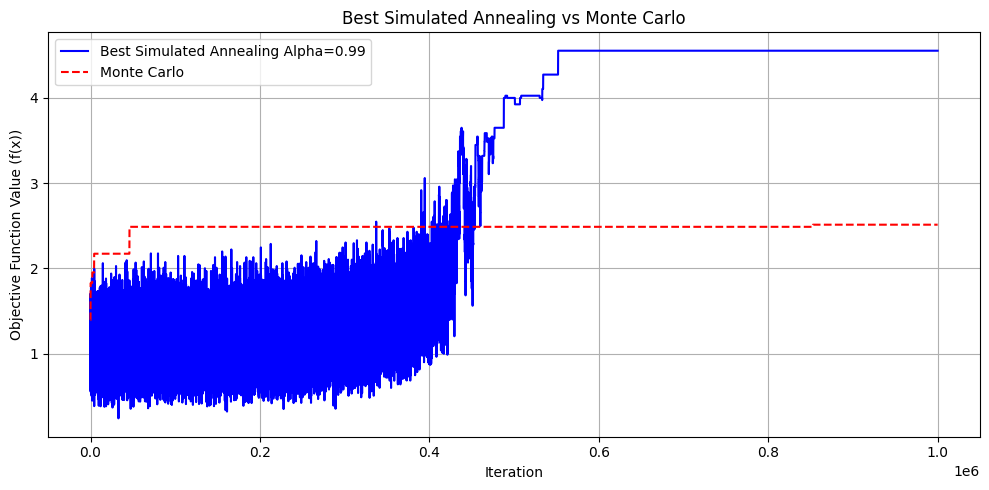

In [78]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(best_history, label=f"Best Simulated Annealing Alpha={alpha}", color='b')
ax.plot(f_history_mc, label='Monte Carlo', linestyle='--', color='r')

ax.set_title("Best Simulated Annealing vs Monte Carlo")
ax.set_xlabel('Iteration')
ax.set_ylabel('Objective Function Value (f(x))')
ax.legend()
ax.grid(True)

# Save the plot
fig.savefig("plot_best_setting_vs_monte_carlo.png", dpi=300)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()